# Data management

## Machine Learning - Regressions

## [Michel Coppée](https://www.uliege.be/cms/c_9054334/fr/repertoire?uid=u224042) & [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()


Regression belongs like classification to the field of **supervised learning**. 


<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
<strong>Regression predicts numerical values</strong> 
in contrast to classification which predicts categories.
</div>

<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
    Other differences are:
<ul>
    <li> Accuracy in measured differently </li>
    <li> Other algorithms </li>
   </ul>

</div>

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn

## Set up and load data

## Boston housing data

We use as an example the **Boston housing data** (from `sklearn`),  collected in 1978, which contains :
- 13 attributes of housing markets around Boston 
- 506 entries: aggregated data for homes from various suburbs in Boston, Massachusetts.

*Objective*: **predict the value of prices** of the house using the given features

In [3]:
from sklearn.datasets import load_boston
data = load_boston() # object is a dictionary
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Data Set Characteristics:

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Create $X$ and $y$

In [5]:
X_full= data.data
y_full= data.target

n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples, n_features)

506 13


In [6]:
X_df=pd.DataFrame(X_full, columns=data['feature_names']) # to dataframe format
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Look for null values in the dataset

In [7]:
X_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

There is none

## Exploratory Data Analysis

### Quantity to predict= price (`target` or $y$) 

Before the regression, let us inspect the features and their distributions. 

In [8]:
y_full.shape

(506,)

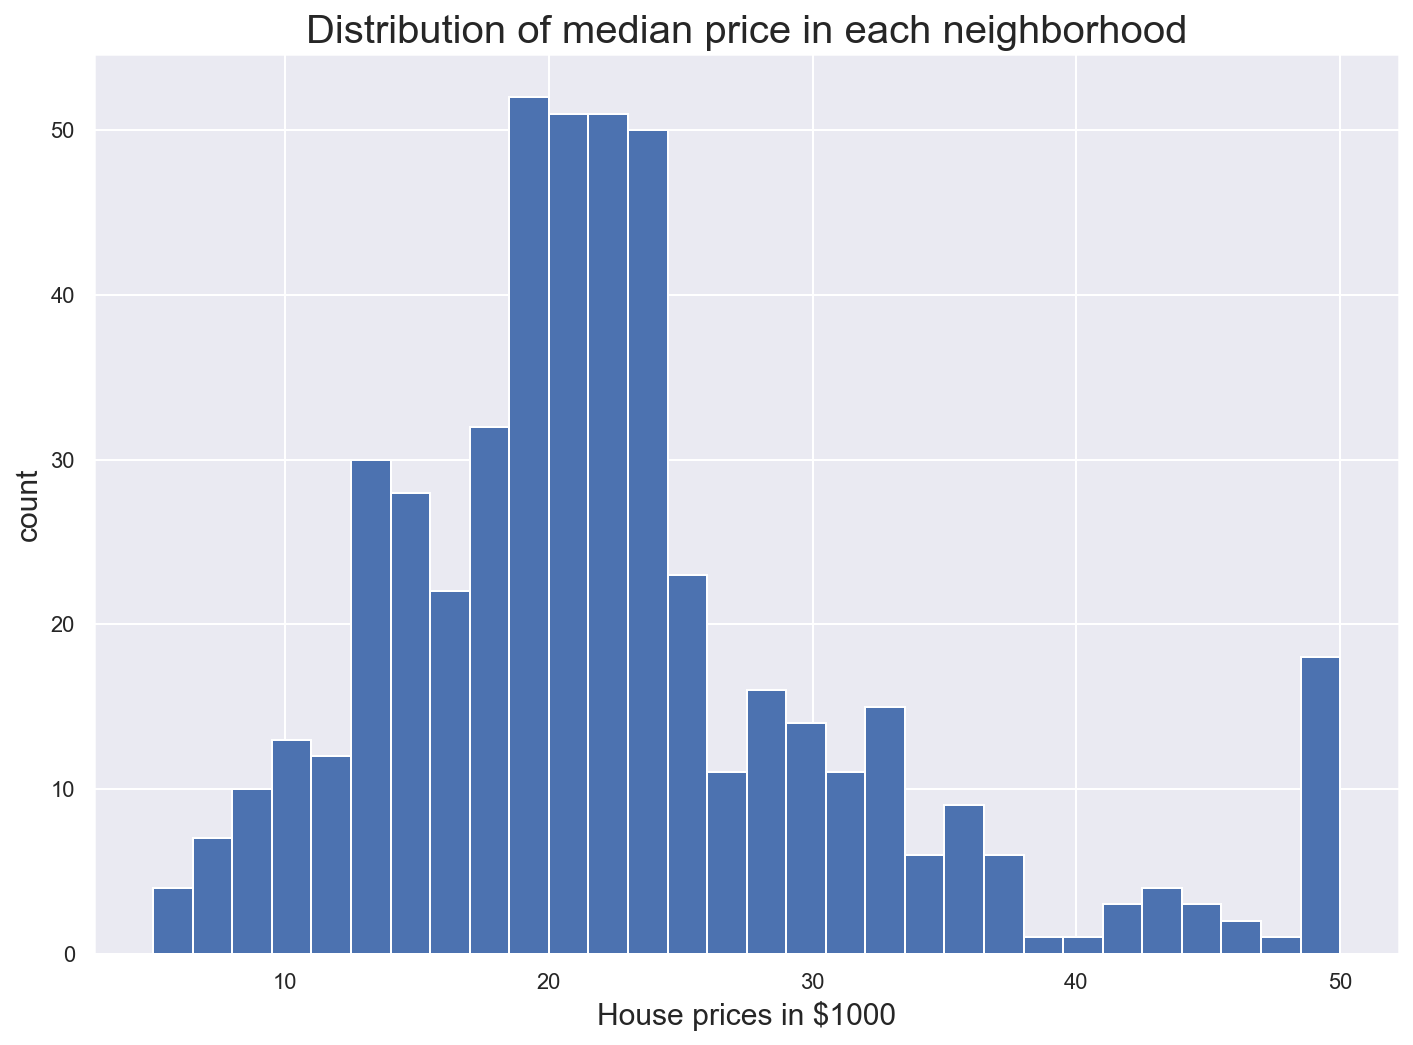

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices in $1000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()

### Features ($X$) used for prediction

In [10]:
X_full.shape

(506, 13)

#### Distributions
**Histogram plots** to look at the distribution

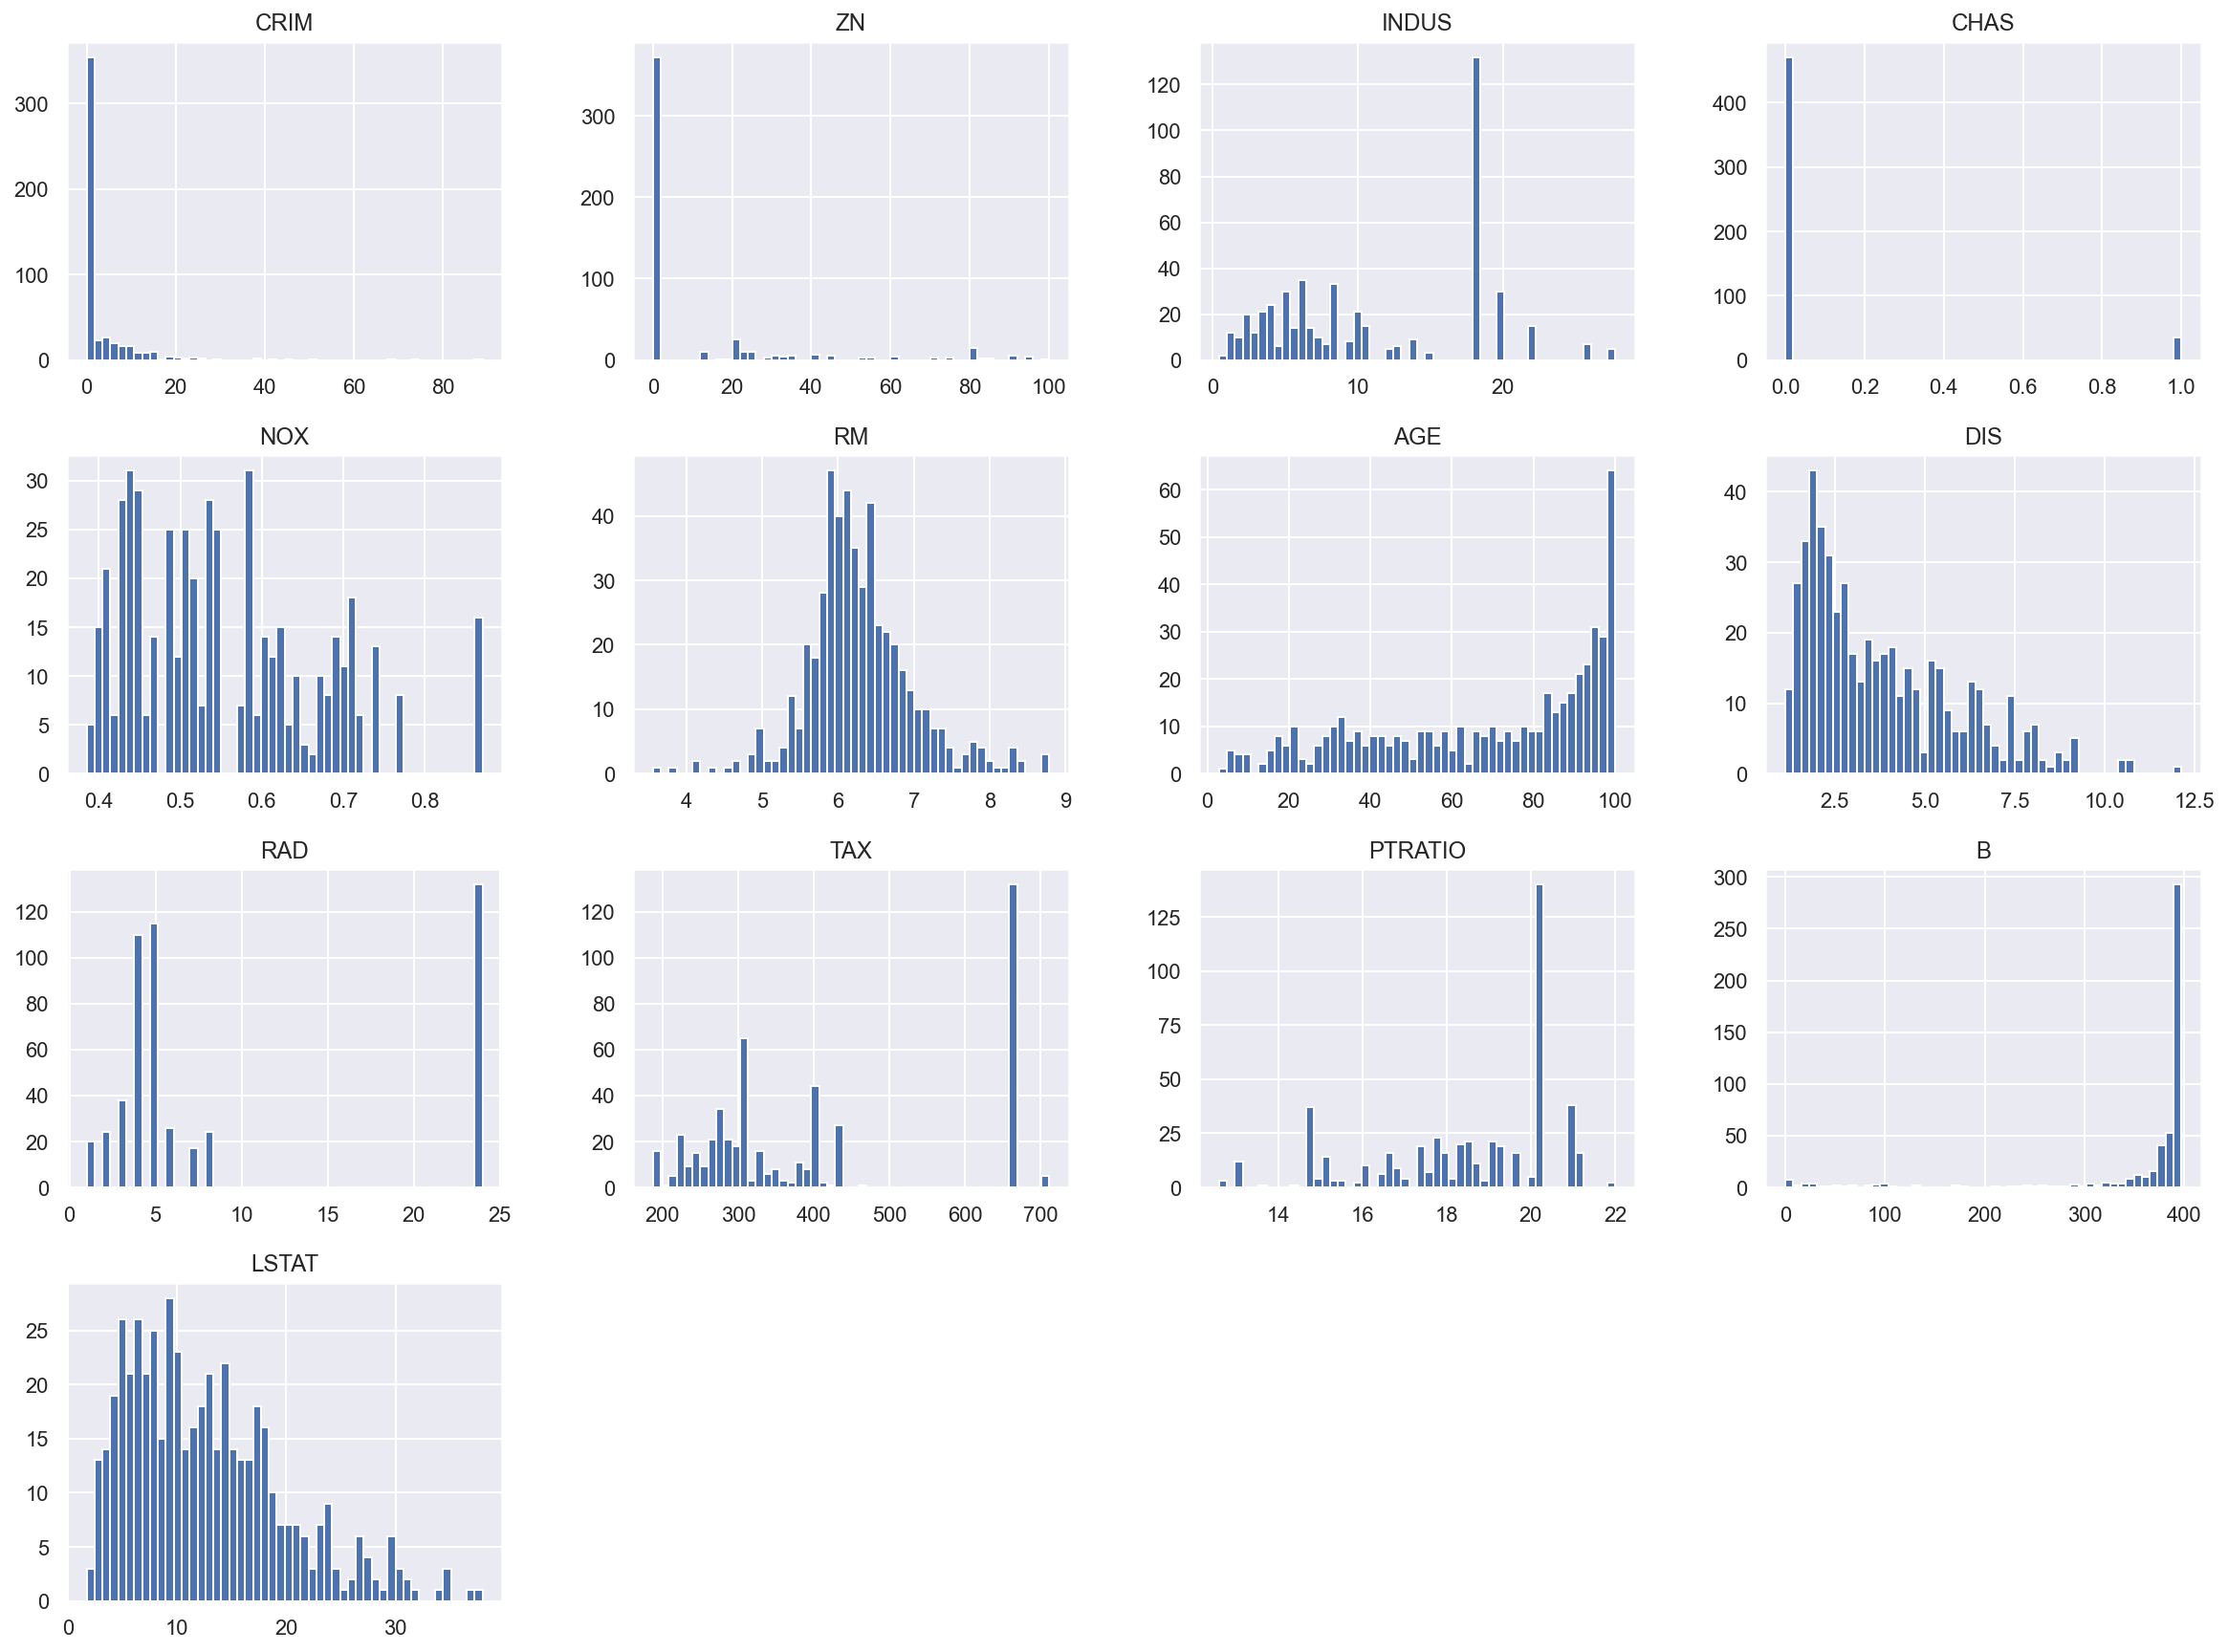

In [11]:
X_df.hist(bins=50, figsize=(20,15))
plt.show()

### Correlations

**Boston Correlation Heatmap Example with Seaborn**

The seaborn package offers a heatmap that will allow a two-dimensional graphical representation of the Boston data. The heatmap will represent the individual values that are contained in a matrix are represented as colors.

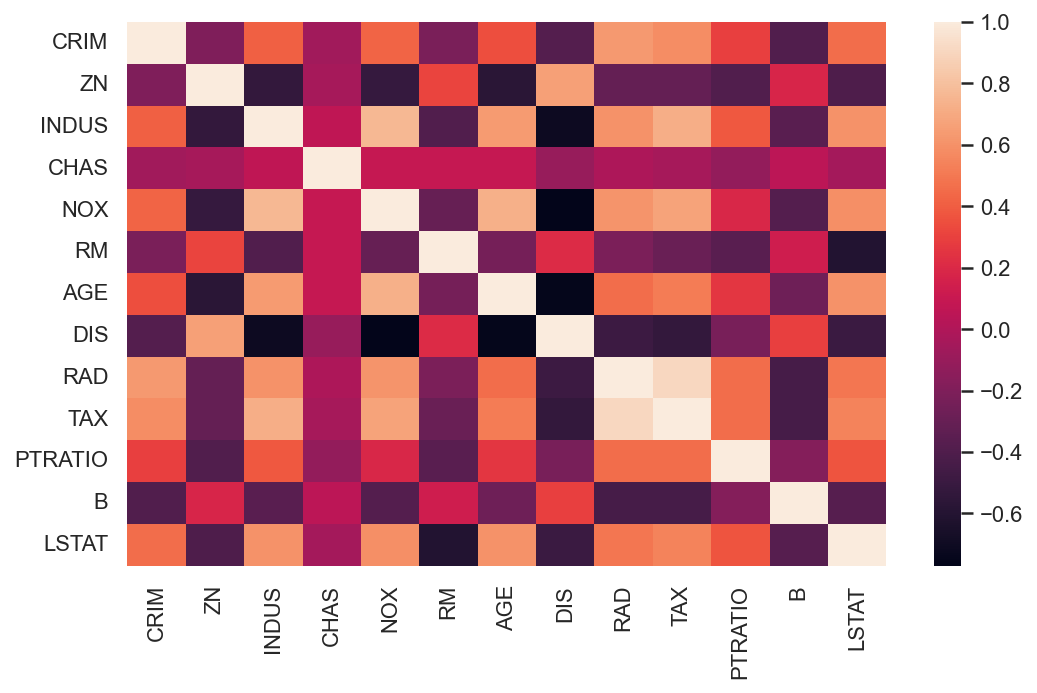

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = X_df.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

### Check for multicolinearity

An important point in selecting features for a linear regression model is to check for **multicolinearity**. 

The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. 

Same goes for the features DIS and AGE which have a correlation of -0.75.

### Correlation plots

array([[<AxesSubplot:xlabel='DIS', ylabel='DIS'>,
        <AxesSubplot:xlabel='AGE', ylabel='DIS'>,
        <AxesSubplot:xlabel='RAD', ylabel='DIS'>,
        <AxesSubplot:xlabel='TAX', ylabel='DIS'>],
       [<AxesSubplot:xlabel='DIS', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='RAD', ylabel='AGE'>,
        <AxesSubplot:xlabel='TAX', ylabel='AGE'>],
       [<AxesSubplot:xlabel='DIS', ylabel='RAD'>,
        <AxesSubplot:xlabel='AGE', ylabel='RAD'>,
        <AxesSubplot:xlabel='RAD', ylabel='RAD'>,
        <AxesSubplot:xlabel='TAX', ylabel='RAD'>],
       [<AxesSubplot:xlabel='DIS', ylabel='TAX'>,
        <AxesSubplot:xlabel='AGE', ylabel='TAX'>,
        <AxesSubplot:xlabel='RAD', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>]], dtype=object)

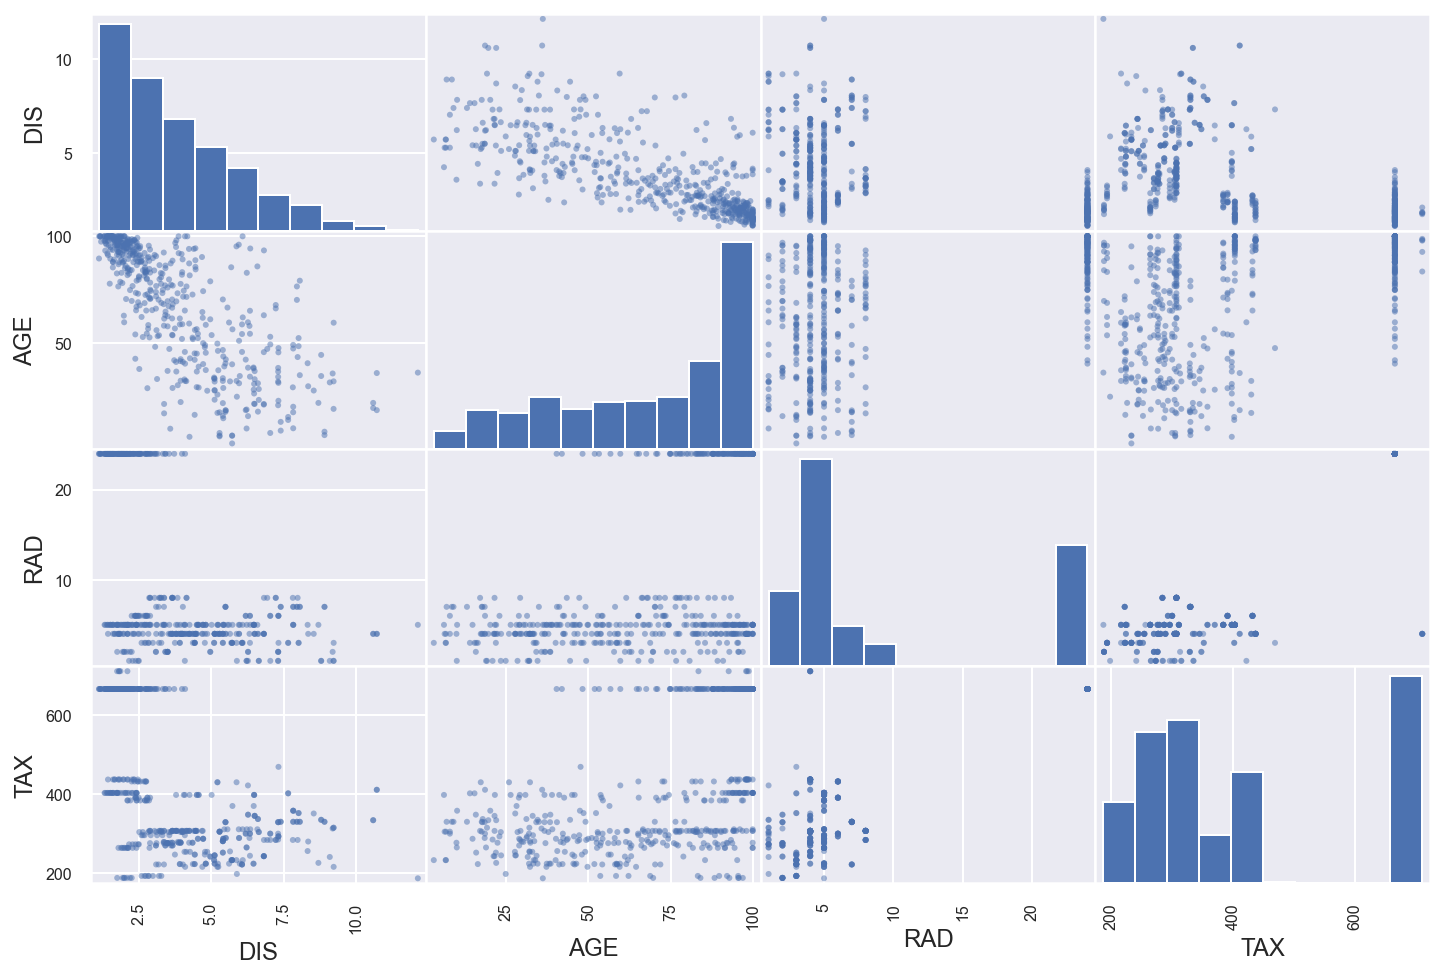

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_df[['DIS', 'AGE','RAD', 'TAX']], figsize=(12, 8))

### Scatter plot relative to the target (price)

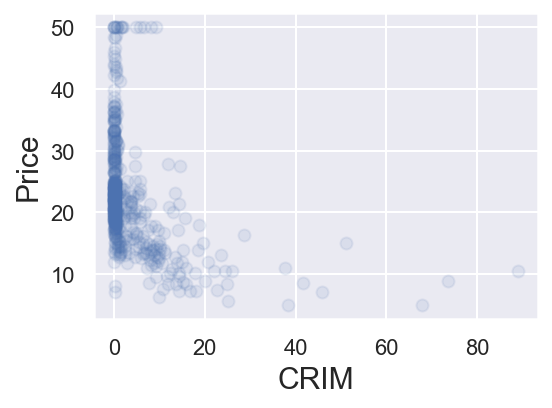

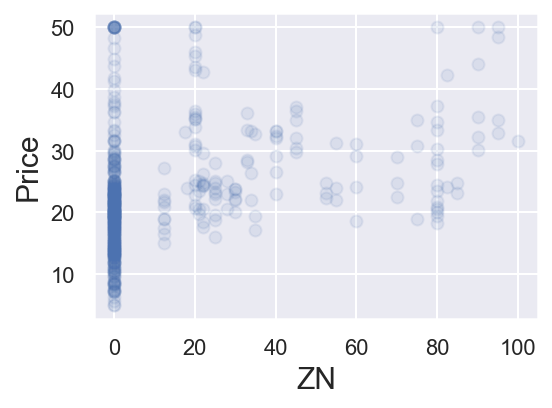

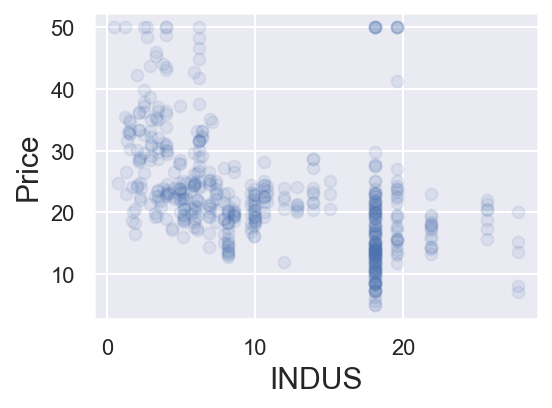

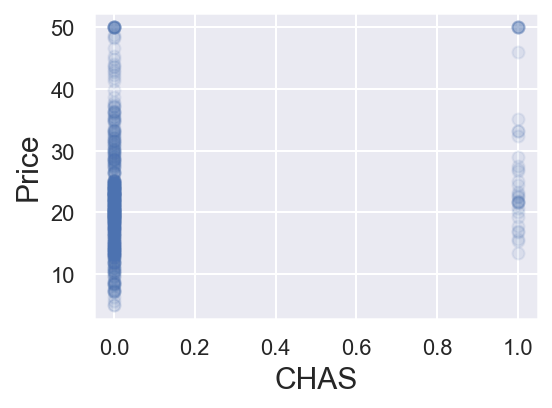

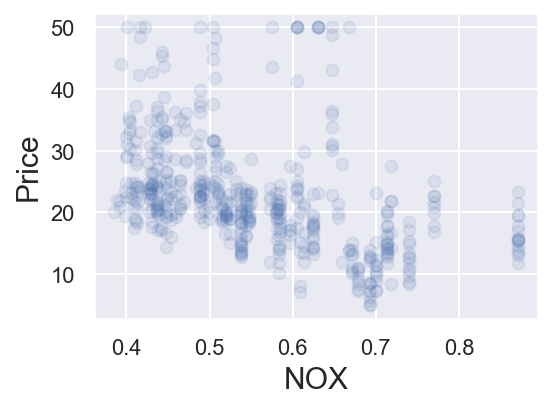

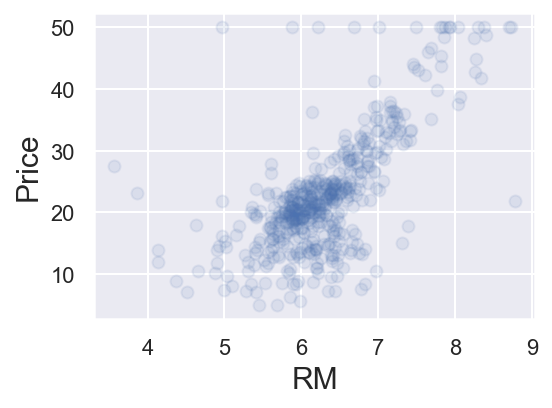

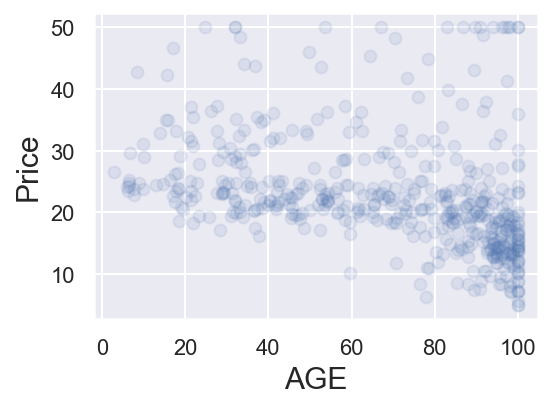

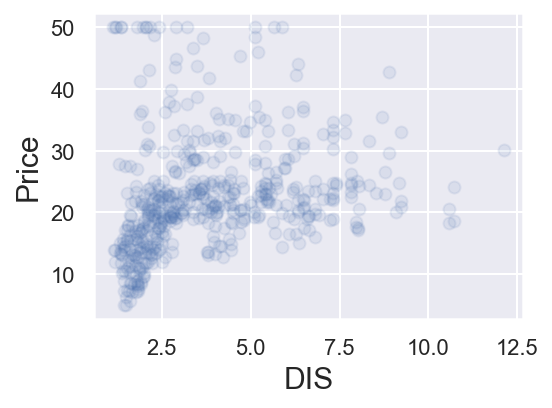

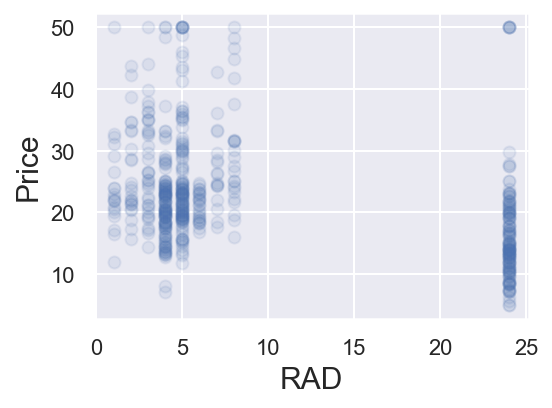

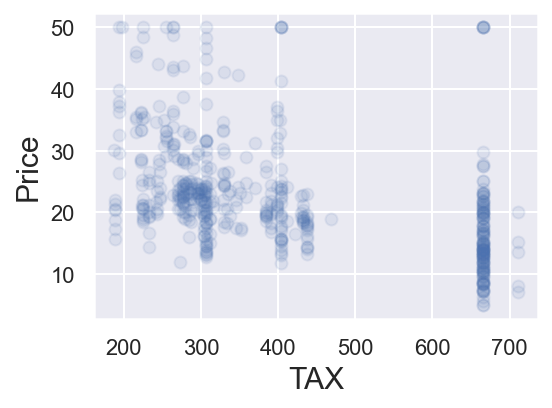

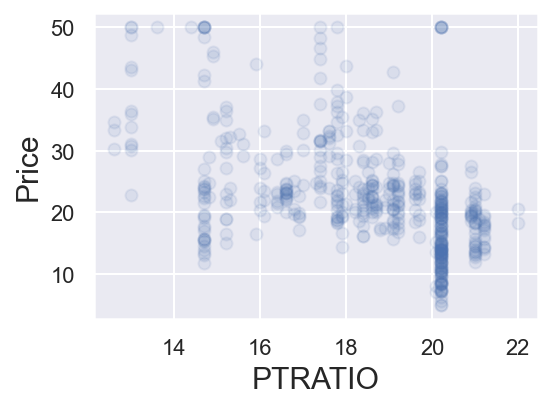

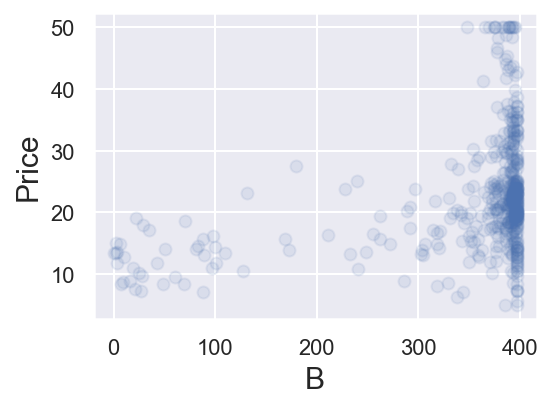

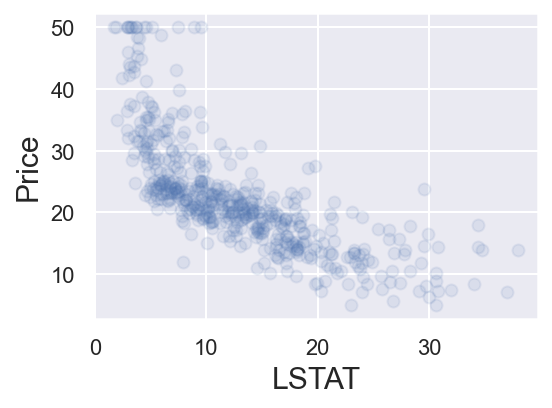

In [14]:
for feature_name in X_df.columns:
    plt.figure(figsize=(4, 3))
    plt.scatter(X_df[feature_name], y_full, alpha=0.1)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

### What can we say ? 

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

##  Linear Regression (Theory) 

$$Y=\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon $$

$=$ one of the simplest algorithms for doing supervised learning

A good starting point before studying more complex learning methods

*Notes*:

Interpretation of $\beta_j$ = the average effect on $Y$ of a unit increase in $X_j$ holding all other predictors fixed


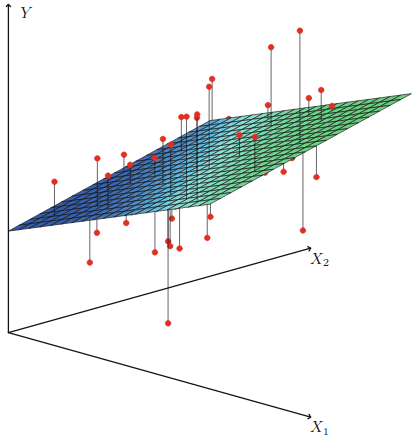

### Extensions of the Linear Model

Going further model's assumptions:

- the **additive**: the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors

-  **linearity**: the change in the response $Y$ due to a one-unit change in $X_j$ is constant


#### Interactions
- Adding interacted variable can help
- Should respect the <bcolor>hierarchy principle</bcolor>:
  - if an interaction is included, the model should always include the main effects as well

Notes:
- Even if the p-value associated with their coef is not significant
- Interactions are hard to interpret without main effects in the model

#### Non Linearity
- Include transformed versions of the predictors in the model


$\Rightarrow$ Including polynomials in $X$ may provide a better fit

### Linear Models: pros and cons
- [Pros]():
  - Interpretability
  - Good predictive performance
  - Accuracy measures for
      - coefficient estimates (standard errors and confidence intervals)
      - the model

- [Cons]():
  - When $p>n$
  - Tend to over-fit training data.
  - Cannot handle multicollinearity.

## Scikit-Learn Design Overview

### Transformer (preprocessor): An object that transforms a data set.
- e.g. `preprocessing.StandardScaler`
- Transformation is performed by the `transform()` method.

### Estimator: an object that can estimate parameters
- e.g. `linear_models.LinearRegression`
- Estimation performed by `fit()` method
- Exogenous parameters (provided by the researcher) are called `hyperparameters`
- The convenience method `fit_transform()` both fits an estimator and returns the transformed input data set.

### Predictor: An object that forms a prediction from an input data set.
- e.g. `LinearRegression`, after training
- The `predict()` method forms the predictions.
- It also has a `score()` method that measures the quality of the predictions given a test set.

### Miscellaneous
- **Inspection**: Hyperparameters and parameters are accessible. Learned parameters have an underscore suffix (e.g.`lin_reg.coef_`)
- **Non-proliferation of classes**: Use native Python data types; existing building blocks are used as much as possible.
- **Sensible defaults**: Provides reasonable default values for hyperparameters – easy to get a good baseline up and running

## Our first ML model
1. Prepare the data for the ML algorithm
2. Split train & test sets
3. `Fit` on the train set & `predict`
4. Evaluate

## 1. Prepare the data for ML algorithms

### Drop some labeled observations:

Drop the observations with price >=50 (because of the right censure)

In [15]:
mask=y_full<50

y_full=y_full[mask==True]
X_full=X_full[mask==True]
X_df=X_df[mask==True]

## 2. Split train test sets 
### Using `train_test_split`
Pure ramdomness of the sampling method

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (392, 13) (392,)
test data (98, 13) (98,)


### Data cleaning
The missing features should be:
1. dropped
2. imputed to some value (zero, the mean, the median...)

### Feature Scaling
Most common scaling methods: 
- **standardization**= normalization by substracting the mean and dividing by the standard deviation (values are not bounded)
- **Min-max scaling**= normalization by substracting the minimum and dividing by the maximum (values between `0` and `1`)

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Select and Train a Model
**Regression algorithm** (we consider firs the `LinearRegression`, more algorithms will be discussed later):

### First algorithm: Simple Linear Regression 

In [18]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;<strong><code>scikit-learn</code> API</strong>

In <code>scikit-learn</code> all regression algorithms have:
<ul>
    <li>a <strong><code>fit()</code></strong> method to learn from data, and</li>
    <li>and a subsequent <strong><code>predict()</code></strong> method for predicting numbers from input features.</li>
</ul>
</div>

In [19]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train, y_train), 2)))

R-squared for training dataset:0.79


In [21]:
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset & scaled features:0.79


Note: $R^2 =$ **the proportion of variance (of $y$) that has been explained by the independent variables in the model**. 


### Coefficients of the linear regression

In [22]:
lin_reg.coef_

array([-0.82250959,  0.96267645, -0.54388693,  0.187684  , -1.50325117,
        2.15830284, -0.54795352, -2.78522878,  2.16616351, -2.21708013,
       -1.8582422 ,  0.71805978, -2.70105292])

In [23]:
features = list(X_df.columns)
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [24]:
print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'CRIM': -0.82, 'ZN': 0.96, 'INDUS': -0.54, 'CHAS': 0.19, 'NOX': -1.5, 'RM': 2.16, 'AGE': -0.55, 'DIS': -2.79, 'RAD': 2.17, 'TAX': -2.22, 'PTRATIO': -1.86, 'B': 0.72, 'LSTAT': -2.7}


## 4. Metrics / error measures   

`scikit-learn` offers the following metrics for measuring regression quality:


#### Mean squared error (mse)

Here we replace the absolute difference by its squared difference. Squaring also insures positive differeces.


<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean squared error</strong> is defined as 



$$
\frac{1}{n} \left(\, (y_1 - \hat{y}_1)^2 \, + \, (y_2 - \hat{y}_2)^2 \, \, \ldots \,+ \,(y_n - \hat{y}_n)^2 \,\right)
$$


</div>



This measure is more sensitive to **outliers**: A few larger differences contribute more significantly to a larger mean squared error. 

`neg_mean_squared_error` in `scikit-learn`.

#### Mean absolute error

Taking absolute values before adding up the deviatons assures that deviations with different signs can not cancel out.

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean absolute error</strong> is defined as 


$$
\frac{1}{n} \left(\, |y_1 - \hat{y}_1| \, + \, |y_2 - \hat{y}_2| \, + \, \ldots \,+ \,|y_n - \hat{y}_n| \,\right)
$$


</div>


`neg_mean_absolute_error` in `scikit-learn`.

#### Median absolute error

Here we replace mean calculation by median. 

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>median absolute error</strong> is defined as 



$$
\text{median}\left(\,|y_1 - \hat{y}_1|, \,|y_2 - \hat{y}_2|, \,\ldots, \,|y_n - \hat{y}_n| \, \right)
$$


</div>


This measure is less sensitive to outliers: A few larger differences will not contribute significantly to a larger error value. 

`neg_median_absolute_error` in `scikit-learn`.

#### Mean squared log error

The formula for this metric can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-log-error). 

This metric is recommended **when your target values are distributed over a huge range of values**, like popoluation numbers. 

The previous error metrics would put a larger weight on large target values. 

The name is `neg_mean_squared_log_error`

In [25]:
y_train_pred = lin_reg.predict(X_train_scaled)

### In-sample performance with MSE = in the training set

In [26]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMSE: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMSE: 3.6792311563556526


<div class="alert alert-info">
<h3> Your turn</h3>
    Compute:
    <ul>
        <li>the out-of-sample mean squarred error = **test mse**
        </li>
        <li> mean  absolute error (using $mean\ absolute\ error$ from $sklearn.metrics$: you need to import the function)
        </li>
    </ul>
</div>

In [27]:
#1. Out-of-sample performance = test RMSE
y_test_pred = lin_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMS: %s" % test_rmse) 

RMS: 3.8824350594341404


In [28]:
# 2. mean  absolute error (in the test set)
from sklearn.metrics import mean_absolute_error

lin_mae_train = mean_absolute_error(y_train, y_train_pred)
lin_rmae_train = np.sqrt(lin_mae_train)
print("RMAE (train): %s" % lin_rmae_train) 

lin_mae = mean_absolute_error(y_test, y_test_pred)
lin_rmae = np.sqrt(lin_mae)
print("RMAE (test): %s" % lin_rmae) 

RMAE (train): 1.6605438815632245
RMAE (test): 1.697924937687455


### Evaluating Regression Models: $R^2$

The $R^2$-score 
- = **the proportion of variance (of $y$) that has been explained by the independent variables in the model**. 
- takes values in the range $[0, 1]$. $\Rightarrow $  larger values indicate better regression results.

- The name within `scikit-learn` is `R2`. 

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>$R^2$</strong> is defined as 

$$
R^2= 1-\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

</div>

### MSE vs. $R^2$ 

MSE :  
- good for comparing regression models, 
- but the units depend on the outcome variable and 
- $\Rightarrow$ are not interpretable

Better to use $R^2$ in the test set: same ranking as MSE but it **more interpretable**.

In [29]:
from sklearn.metrics import r2_score

r2_train=round(r2_score(y_train, y_train_pred), 2)
print("R2: %s" % r2_train) 

R2: 0.79


In [30]:
from sklearn.metrics import r2_score

r2=round(r2_score(y_test, y_test_pred), 2)
print("R2: %s" % r2) 

R2: 0.73


### Binned Regression Plots

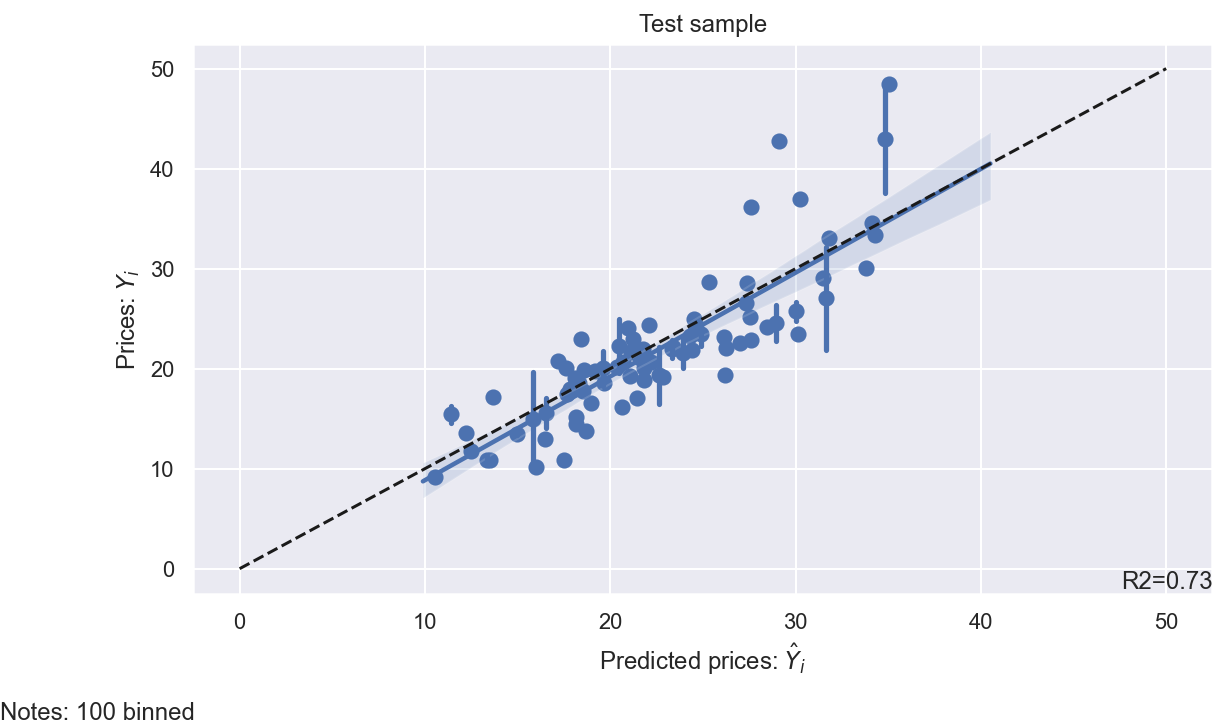

In [31]:
# Regplot
g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")

plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

### Plotting Regression Residuals

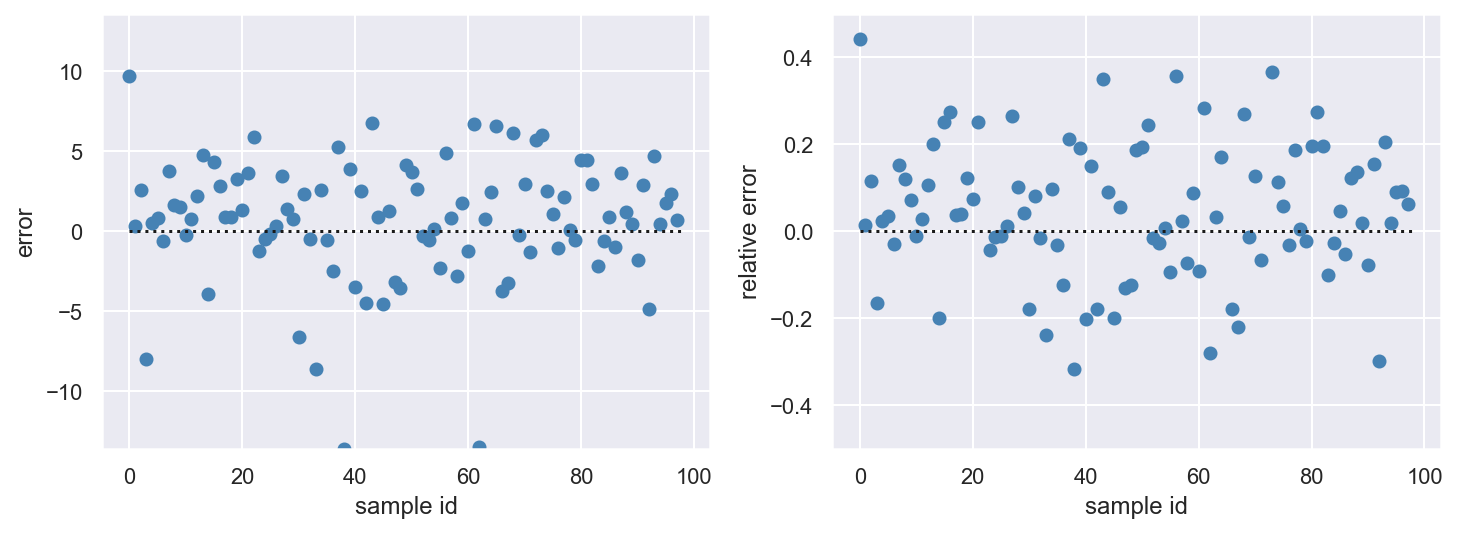

In [32]:
#Let us plot how good given and predicted values match on the training data set (sic !).
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(y_test, y_test_pred)

### Polynomial regression
#### Polynomial features

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2)

X_train_poly=poly_features.fit_transform(X_train)

In [34]:
X_train_poly.shape

(392, 105)

<div class="alert alert-info">
<h4> Your turn</h4>
    Build the polynomials features for the test set
</div>

In [35]:
X_test_poly=poly_features.fit_transform(X_test)

<div class="alert alert-info">
<h4> Your turn</h4>
    Fit a linear regression using the polynomial features
</div>

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

<div class="alert alert-info">
<h4> Your turn</h4>
    Predict the outcome using the estimated model
</div>

In [37]:
y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)

<div class="alert alert-info">
<h4> Your turn</h4>
    Compute the test MSE, R2 on the train & test sample
</div>

In [38]:
# train sample
r2=round(r2_score(y_train, y_train_pred), 2)
print("R2: %s" % r2) 

R2: 0.92


In [39]:
r2=round(r2_score(y_test, y_test_pred), 2)
print("R2: %s" % r2) 

R2: 0.76


In [40]:
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
#print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
#print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

test RMS: 3.7051966803243634


## Generalization of the Linear Models
- **Regularized fitting**: ridge regression and lasso

- **Classification problems**: logistic regression, support vector machines

- **Non-linearity**: nearest neighbor methods

- **Interactions**: Tree-based methods, random forests and boosting

Notes:
In much of the rest of the class, we discuss methods that expand the scope of linear models and how they are fit:

### Regularized Regressions
<html><div style='float:left'></div><hr color='#EB811B' size=1px width=796px></html>

#### Why Regularization?

- Solution against **over-fitting**

-  Allow High-Dimensional Predictors
  - $p>>n$: OLS no longer has a unique solution
  - $x_i$ "high-dimensional" i.e. very many regressors
    - pixels on a picture

Corollary of regularization:
- Prediction Accuracy: especially when $p > n$, to control the variance

### Adding a Regularization Term to the Loss Function $L(.)$

$$ \hat \beta =arg min_\beta \frac{1}{n} \sum_{i=1}^n L(h(x_i, \beta), y_i) +\lambda R(\beta) $$

- $R(\beta)$ = <bcolor> regularization  function </bcolor>
  - $R(\beta)=\sum_{i=1}^n p(\beta_i)$ for $p(.)$ the penalty function

- $\lambda$ is a <bcolor>hyperparameter</bcolor> where higher values increase regularization

#### Different Penalty Functions $p()$
- **Ridge (L2)**: $p(\beta_j)=\beta_j^2$

- **LASSO (L1)**: $p(\beta_j)=|\beta_j|$

- **Elastic Net**: $p(\beta_j)=\alpha |\beta_j|+(1-\alpha) \beta_j^2$

- **Ridge**: shrinks coefficients toward zero and helps select between collinear predictors.
- **Lasso** automatically performs feature selection and outputs a sparse model.

Also: 
- **Subset selection**: $p(\beta_j)=1\\{\beta_j\neq 0\\}$

### Ridge Regression

$$min_{\beta} \sum_{i=1}^n (y_i - \hat y_i)^2 + \lambda \sum_{j=1}^p \beta_j^2 $$

- $\lambda > 0$ = penalty parameter
- covariates can be high-dimensionnal $p>>N$

Trade-off, from the minimization of the sum of
1. **RSS**
2. **Shrinkage penalty**: decreases with $\beta_j$

$\rightarrow$ relative importance given by $\lambda$

RSS= Residual sum of squares

- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.
- When $\lambda=0$, the penalty term has no effect, and ridge regression will produce the least squares estimates
- when $\lambda \rightarrow \infty$ : penalty grows and coefficient estimates approach zero

### Ridge Regression: shrinkage to $0$
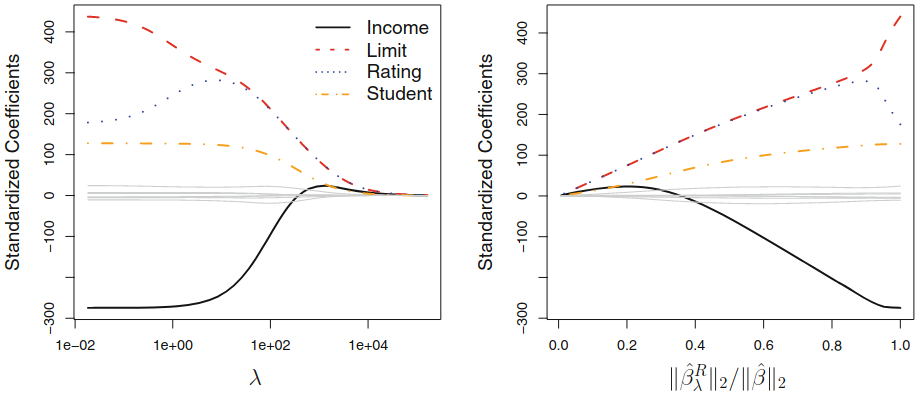

### Ridge: Variance-Bias Trade-Off
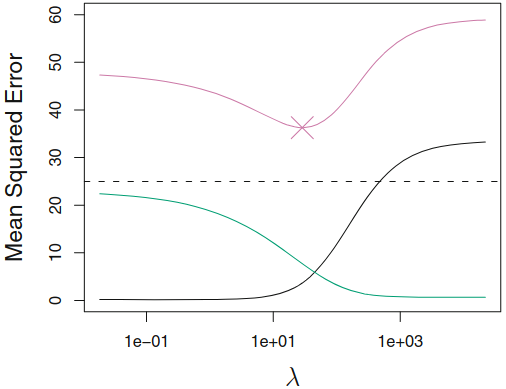
Squared bias (black), variance (green), [test] MSE (red)

- As $\lambda$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias
- Up to 10, the variance decreases rapidly, with very little increase in bias
- Beyond this point, the decrease in variance due to increasing $\lambda$ slows, and the shrinkage on the coefficients causes them to be significantly underestimated
- Recall that the test MSE (purple), is a function of the variance plus the squared bias.

### Ridge vs. Linear Models

- when outcome and predictors are close to having a linear relationship, the OLS will have low bias but potentially high variance
  - small change in the training data $\rightarrow$ large change in the estimates
  - worse with $p$ close tp $n$
  - if $p>n$, OLS do not have a unique solution

$\rightarrow$ ridge regression works best in situations where the least squares estimates have high variance

<div class="alert alert-info">
<h2> Your turn: RIDGE model </h2>
    
Train a ridge model and look at the goodeness of fit. 

</div>

In [41]:
from sklearn.linear_model import Ridge

In [42]:
ridge_reg=Ridge(alpha=2)         # Set up
ridge_reg.fit(X_train, y_train)  # estimation

Ridge(alpha=2)

In [48]:
y_train_pred =ridge_reg.predict(X_train)
y_test_pred =ridge_reg.predict(X_test)

In [49]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

In [50]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 

train RMS: 3.705938799924318
test RMS: 3.899152976606062


In [51]:
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

train R2: 0.78
test R2: 0.73


In [52]:
ridge_reg.coef_

array([-0.09469915,  0.04282599, -0.11604906,  0.62595836, -4.79491595,
        3.33684864, -0.02670873, -1.20976059,  0.22936565, -0.01387299,
       -0.79816398,  0.00799729, -0.37660749])

In [53]:
print('The coefficients of the features from the Ridge model:')
print(dict(zip(features, [round(x, 2) for x in ridge_reg.coef_])))

The coefficients of the features from the Ridge model:
{'CRIM': -0.09, 'ZN': 0.04, 'INDUS': -0.12, 'CHAS': 0.63, 'NOX': -4.79, 'RM': 3.34, 'AGE': -0.03, 'DIS': -1.21, 'RAD': 0.23, 'TAX': -0.01, 'PTRATIO': -0.8, 'B': 0.01, 'LSTAT': -0.38}


### LASSO
*Objective*: Overcome an important drawback of Ridge (where all $p$ predictors are included in the final model)

LASSO model just **includes the most important predictors**.

Better for interpretability than Ridge!

**Ridge**: the penalty shinks coefficients toward $0$ but not exactly to $0$

This may not be a problem for prediction accuracy, but it can create a challenge in model interpretation when $p$ is quite large

#### Lasso Coefficients
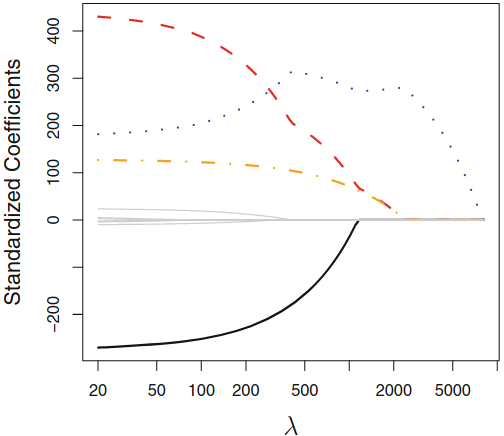

- When $\lambda=0$: the lasso simply gives the least squares fit
- when $\lambda$ becomes sufficiently large, the lasso gives the null model in which all coefficient estimates equal 0.
- in between these two extremes, the ridge regression and lasso models are quite different from each other

## Lasso: Variance-Bias Trade-Off
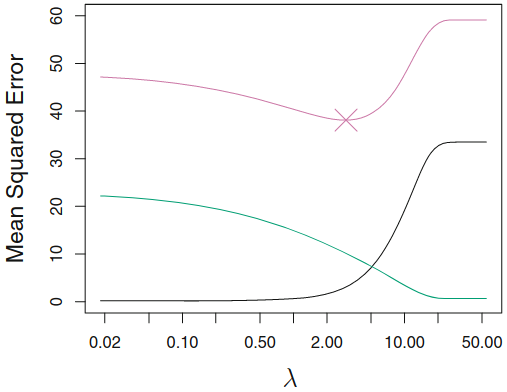
Squared bias (black), variance (green), [test] MSE (red)


## Lasso model

In [57]:
from sklearn.linear_model import Lasso

In [59]:
lasso_reg=Lasso(alpha=1) # set the model
lasso_reg.fit(X_train, y_train) # estimate the model

y_train_pred = lasso_reg.predict(X_train)        # predict on the test set
y_test_pred = lasso_reg.predict(X_test)        # predict on the test set
test_mse = mean_squared_error(y_test, y_test_pred) # compute MSE
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.579918320353293
train R2: 0.71
test R2: 0.63


<div class="alert alert-info">
<h2> Your turn: Lasso regression using the scaled version of X </h2>
    
Train a Lasso regression and look at the goodeness of fit
</div>


In [60]:
lasso_reg=Lasso(alpha=1) # set up       
lasso_reg.fit(X_train_scaled, y_train)

y_train_pred = lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.342235733030308
train R2: 0.71
test R2: 0.66


In [61]:
print('The coefficients of the features from the Lasso model:')
print(dict(zip(features, [round(x, 2) for x in lasso_reg.coef_])))

The coefficients of the features from the Lasso model:
{'CRIM': -0.0, 'ZN': 0.0, 'INDUS': -0.23, 'CHAS': 0.0, 'NOX': -0.0, 'RM': 2.02, 'AGE': -0.0, 'DIS': 0.0, 'RAD': -0.0, 'TAX': -0.64, 'PTRATIO': -1.17, 'B': 0.06, 'LSTAT': -2.88}


### Elastic Net = Lasso + Ridge
$$ MSE(\beta)+\lambda_1 \sum_{j=1}^p |\beta_j| +\lambda_2 \sum_{j=1}^p \beta_j^2$$

$\lambda_1$, $\lambda_2$ $=$ strength of L1 (Lasso) penalty and L2 (Ridge) penalty


### Selecting Elastic Net Hyperparameters

- Elastic net **hyperparameters** should be selected to optimize out-of-sample fit (measured by mean squared error or MSE).

- **“Grid search”**
  - scans over the hyperparameter space ($\lambda_1 \geq 0, \lambda_2\geq 0$),
  - computes out-of-sample MSE for all pairs $(\lambda_1, \lambda_2)$ ,
  - selects the MSE-minimizing model.

### Elastic Net in `sklearn`

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
elanet_reg=ElasticNet(random_state=0)
elanet_reg.fit(X_train_scaled, y_train)

y_test_pred = elanet_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.3638219635978235
train R2: 0.71
test R2: 0.66


In [ ]:
print('The coefficients of the features from the Lasso model:')
print(dict(zip(features, [round(x, 2) for x in elanet_reg.coef_])))

## Setting the **regularization parameter**: generalized Cross-Validation.

In [65]:
alphas=np.logspace(-6, 6, 13) 
alphas

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [67]:
from sklearn.linear_model import LassoCV

lassocv_reg = LassoCV(alphas=alphas)
lassocv_reg.fit(X_train, y_train)
alpha=lassocv_reg.alpha_ 
print("Best alpha", alpha)

Best alpha 0.001


### Then re-run the model using the best $\alpha$

In [68]:
lasso_reg=Lasso(alpha=alpha)       

lasso_reg.fit(X_train_scaled, y_train)

y_train_pred=lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 3.8818140112445043
train R2: 0.79
test R2: 0.73


## Fine-tuning of the Model

### Model Evaluation using Cross-Validation

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; cross_val_score expect a utility function rather than a cost function: the scoring function is the opposite of the MSE. 
</div>


In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Perform 6-fold cross validation
scores = cross_val_score(elanet_reg, X_train_scaled, y_train, 
                         scoring="neg_mean_squared_error", cv=5)
scores

array([-14.96383737, -20.02416214, -20.20072418, -22.69197907,
       -19.66651518])

### Make cross validated predictions

In [70]:
y_train_pred_cv = cross_val_predict(elanet_reg, X_train_scaled, y_train, cv=5)

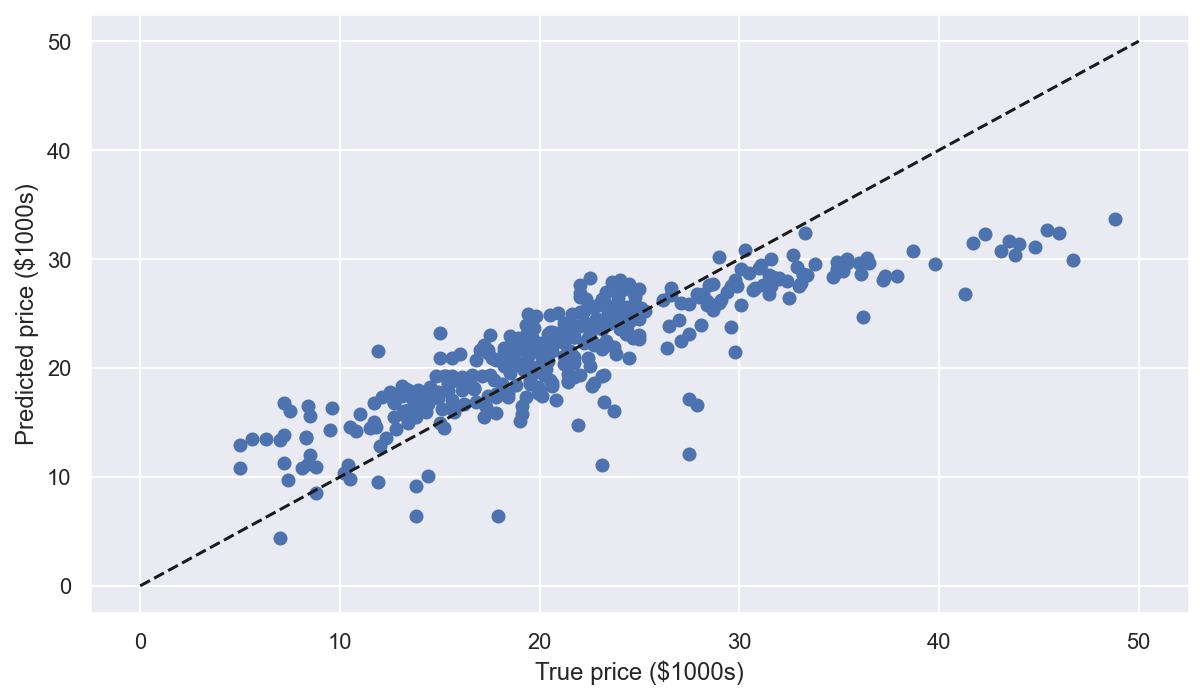

In [71]:
## plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_cv)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [72]:
accuracy =r2_score(y_train, y_train_pred_cv)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.6910345977768512


### Hyperparameters tuning

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1 ,1, 10],
      'l1_ratio':[.1,.5,.9,1]}
    
]
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(elanet_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=0),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'l1_ratio': [0.1, 0.5, 0.9, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

### The best hyperparameter combination found:

In [74]:
grid_search.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [75]:
grid_search.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=0)

### Score of each hyperparameter combination tested during the grid search

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

### In a DataFrame

In [ ]:
df_cvres=pd.DataFrame(cvres)
df_cvres['mean_test_score_pos_sqrt']=df_cvres['mean_test_score'].apply(lambda x: np.sqrt(-x))
df_cvres['log_param_alpha']=df_cvres['param_alpha'].apply(lambda x: np.log(x))
df_cvres.head()

### Vizualize the grid search results

In [ ]:
_, ax = plt.subplots(1,1)
plt.plot(df_cvres["log_param_alpha"], df_cvres["mean_test_score_pos_sqrt"])
ax.set_title("Grid Search", fontsize=20, fontweight='bold')
ax.set_xlabel("$\log (alpha)$", fontsize=16)
ax.set_ylabel('Avg. mean test score', fontsize=16)

## General ML Procedure

0. Look at the data
1. Select a ML method (eg. LASSO)
2. Draw randomly a hold-out sample from the data
3. Estimate the ML model using different hyperparameters
4. Select the optimal hyperparameters
5. Predict $\hat Y$ using hyperparameters and extrapolated the fitted values to the retarded hold-out-sample
6. Evaluation the prediction power of the ML in the hold-out-sample

## What is not covered in this notebook:
- more advanced regression algorithms (gradient boosting, random forest)
- classification algorithm
- pipelines